Ismail Elnaggar <br>
student number 519208 <br>
imelna@utu.fi  <br>
January, 29th, 2020  <br>

# Exercise 2 | TKO_2096 Application of Data Analysis 2020

#### Prediction of the metal ion content from multi-parameter data <br>
- Use K-Nearest Neighbor Regression with euclidean distance to predict total metal concentration (c_total), concentration of Cadmium (Cd) and concentration of Lead (Pb), for each sample using number of neighbors k = 3.<br> <br>

    - You may use Nearest Neighbor Regression from https://scikit-learn.org/stable/modules/neighbors.html
    - The data should be standarized using z-score.
    - Implement your own Leave-One-Out cross-validation and calculate the C-index for each output (c_total, Cd, Pb). 
    - Implement your own Leave-Replicas-Out cross-validation and calculate the C-index for each output (c_total, Cd, Pb).
    - This exercise provides a bonus point: see "Bonus exercise" in this notebook for details.
    - Return your solution as a Jupyter Notebook file (include your full name in the file name).
    - Submit to moodle your solution on **Wednesday 29. of January** at the latest.

## Import libraries

In [2]:
#In this cell import all libraries you need. For example: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') # doing this because I was getting a pandas warning from slicing a copy

from sklearn.neighbors import KNeighborsRegressor

## Read and visualize the dataset

In [3]:
#In this cell read the file water_data.csv
#Print the dataset dimesions (i.e. number of rows and columns)

waterDF=pd.read_csv("C:/Users/imelna/anaconda/envs/emgEnv/ADA exercises/Water_data.csv",header=0)

print ("The shape of our Water data is:",waterDF.shape,"\n")

print (waterDF.head())

The shape of our Water data is: (225, 6) 

   c_total     Cd      Pb    Mod1  Mod2    Mod3
0     2000  800.0  1200.0  126430  2604    6996
1       35   14.0    21.0   20597   271  138677
2       35   14.0    21.0   24566   269  161573
3       35   35.0     0.0  105732   971  132590
4      100   20.0    80.0   57774  5416   93798


#### To show understanding of the data, answer the following questions:
- How many different mixtures of Cadmium (Cd) and Lead (Pb) were measured? <br>
- How many total concentrations (c_total) were measured? <br>
- For each c_total, how many times the measurement was repeated? To answer this question <br>
  create a table or make a bar plot of c_total / number of repetitions 

In [4]:
#In this cell write the code to answer the previous questions and print the answers.

print ("{0} different mixtures of Cadmium (Cd) were measured".format(len(waterDF["Cd"].unique())),"\n")
print ("{0} different mixtures of Lead (Pb) were measured".format(len(waterDF["Pb"].unique())),"\n")
print ("{0} different total concentrations (c_total) were measured".format(len(waterDF["c_total"].unique())),"\n")

#table
count_ctotal=pd.DataFrame(waterDF["c_total"].value_counts())
count_ctotal.rename(columns={"c_total": "# of Repetitions"},inplace=True)
count_ctotal.insert(0, "Unique c_totals", count_ctotal.index)

print("Table of unique c_totals and the number of occurances of each c_total:")
display(count_ctotal.style.hide_index())


40 different mixtures of Cadmium (Cd) were measured 

40 different mixtures of Lead (Pb) were measured 

12 different total concentrations (c_total) were measured 

Table of unique c_totals and the number of occurances of each c_total:


Unique c_totals,# of Repetitions
200,24
100,24
70,24
50,24
500,18
1000,18
2000,18
5000,18
35,18
20,18


## Standardization of the dataset

In [5]:
#Standardize the dataset features by removing the mean and scaling to unit variance. 
#In other words, use z-score to scale the dataset features (Mod1, Mod2, Mod3) 
#Print the 5 first samples (i.e. rows) of the scaled dataset

cols = ["Mod1", "Mod2", "Mod3"]
for col in cols:
    col_zscore = col + '_zscore'
    waterDF[col_zscore] = (waterDF[col] - (waterDF[col].mean()))/(waterDF[col].std(ddof=0))

water_zscore_DF=waterDF.copy() #copy just to keep original Mod's somewhere
water_zscore_DF.drop(cols,inplace=True,axis=1)

print (water_zscore_DF.head())

   c_total     Cd      Pb  Mod1_zscore  Mod2_zscore  Mod3_zscore
0     2000  800.0  1200.0     0.166505    -0.508756    -1.499041
1       35   14.0    21.0    -0.892616    -0.701641     0.685861
2       35   14.0    21.0    -0.852896    -0.701806     1.065760
3       35   35.0     0.0    -0.040629    -0.643767     0.584863
4      100   20.0    80.0    -0.520568    -0.276268    -0.058789


## C-index code 

In [6]:
def cindex(true_labels, pred_labels):
    """Returns C-index between true labels and predicted labels""" 
    n = 0
    n_sum = 0
    for i in range(len(true_labels)):
        t = true_labels[i]
        p = pred_labels[i]
        for j in range(i+1,len(true_labels)):
            nt = true_labels[j]
            np = pred_labels[j]
            if t != nt:
                n += 1
                if (p < np and t < nt) or (p > np and t > nt):
                        n_sum +=  1
                elif p == np:
                    n_sum += 0.5     
    return (n_sum/n)

In [7]:
#test cindex function with following values
true_labels = [-1, 1, 1, -1, 1]
predictions = [0.60, 0.80, 0.75, 0.75, 0.70]
cindx = cindex(true_labels, predictions)
print(cindx)

0.75


## Functions

In [8]:
#Include here all the functions that you need to run in the data analysis part.

def grouper(data,group,grouplabel):
    """ function to assign group numbers based on the the unique values in a column
    inputs
    ------
        data: pandas dataframe
        group: which column to use to group by (str input)
        grouplabel: name for group column (str input)
    
    """
    
    data[grouplabel] = pd.factorize(data[group])[0] + 1


### Testing grouper function

In [9]:
testdf=water_zscore_DF[["c_total","Mod1_zscore","Mod1_zscore","Mod1_zscore" ]]
grouper(testdf,"c_total","group")
print (testdf.head())

   c_total  Mod1_zscore  Mod1_zscore  Mod1_zscore  group
0     2000     0.166505     0.166505     0.166505      1
1       35    -0.892616    -0.892616    -0.892616      2
2       35    -0.852896    -0.852896    -0.852896      2
3       35    -0.040629    -0.040629    -0.040629      2
4      100    -0.520568    -0.520568    -0.520568      3


## Results for Leave-One-Out cross-validation

1. Use K-Nearest Neighbor Regression to predict total metal concentration (c_total), concentration of Cadmium (Cd) and concentration of Lead (Pb), for each sample using number of neighbors k = 3.

2. The data should be standardized using z-score.

3. Implement Leave-One-Out Cross Validation approach and calculate the C-index for each output (c-total, Cd, Pb). 


In [10]:
### this is basically how leave one out would work.
mylist=list(range(10))
for i in range(len(mylist)):
    xtest=i
    xtrain=mylist[:i]+mylist[i+1:]
    print (xtest,xtrain)

0 [1, 2, 3, 4, 5, 6, 7, 8, 9]
1 [0, 2, 3, 4, 5, 6, 7, 8, 9]
2 [0, 1, 3, 4, 5, 6, 7, 8, 9]
3 [0, 1, 2, 4, 5, 6, 7, 8, 9]
4 [0, 1, 2, 3, 5, 6, 7, 8, 9]
5 [0, 1, 2, 3, 4, 6, 7, 8, 9]
6 [0, 1, 2, 3, 4, 5, 7, 8, 9]
7 [0, 1, 2, 3, 4, 5, 6, 8, 9]
8 [0, 1, 2, 3, 4, 5, 6, 7, 9]
9 [0, 1, 2, 3, 4, 5, 6, 7, 8]


In [13]:
#In this cell run your code for leave-One-Out cross-validation and print the corresponding results.

#constant values
k=3
knn = KNeighborsRegressor(n_neighbors=k)
features=["Mod1_zscore","Mod2_zscore","Mod3_zscore"]

###### C-Total ######

target=["c_total"]
ctotal_predictions=[]
ctotal_tests=[]
ctotalDF=water_zscore_DF[["c_total","Mod1_zscore","Mod2_zscore","Mod3_zscore" ]] #data frame selecting target and features

for i in range(len(ctotalDF)):
    
    xtest=ctotalDF[features].iloc[i]
    ytest=ctotalDF[target].iloc[i]
    xtrain=pd.concat([ctotalDF[features].iloc[:i],ctotalDF[features].iloc[i+1:]])       
    ytrain=pd.concat([ctotalDF[target].iloc[:i],ctotalDF[target].iloc[i+1:]])
    
    #train regressor
    knn.fit(xtrain,ytrain)
    #get predictions
    ypred=knn.predict(np.array(xtest).reshape(1, -1))
    #append true and predicted values to lists
    ctotal_tests.append(ytest.values)
    ctotal_predictions.append(ypred.flatten())

ctotal_cindex=cindex(ctotal_tests,ctotal_predictions)
print ("C-total Cindex =",ctotal_cindex)


###### Cd ######

target=["Cd"]
Cd_predictions=[]
Cd_tests=[]
CdDF=water_zscore_DF[["Cd","Mod1_zscore","Mod2_zscore","Mod3_zscore" ]]  #data frame selecting target and features

for i in range(len(CdDF)):
    
    xtest=CdDF[features].iloc[i]
    ytest=CdDF[target].iloc[i]
    xtrain=pd.concat([CdDF[features].iloc[:i],CdDF[features].iloc[i+1:]])       
    ytrain=pd.concat([CdDF[target].iloc[:i],CdDF[target].iloc[i+1:]])
    
    #train regressor
    knn.fit(xtrain,ytrain)
    #get predictions
    ypred=knn.predict(np.array(xtest).reshape(1, -1))
    #append true and predicted values to lists
    Cd_tests.append(ytest.values)
    Cd_predictions.append(ypred.flatten())
    
Cd_cindex=cindex(Cd_tests,Cd_predictions)
print ("Cd Cindex =",Cd_cindex)


###### Pb ######

target=["Pb"]
Pb_predictions=[]
Pb_tests=[]
PbDF=water_zscore_DF[["Pb","Mod1_zscore","Mod2_zscore","Mod3_zscore" ]]  #data frame selecting target and features

for i in range(len(PbDF)):
    
    xtest=PbDF[features].iloc[i]
    ytest=PbDF[target].iloc[i]
    xtrain=pd.concat([PbDF[features].iloc[:i],PbDF[features].iloc[i+1:]])       
    ytrain=pd.concat([PbDF[target].iloc[:i],PbDF[target].iloc[i+1:]])
    
    #train regressor
    knn.fit(xtrain,ytrain)
    #get predictions
    ypred=knn.predict(np.array(xtest).reshape(1, -1))
    #append true and predicted values to lists
    Pb_tests.append(ytest.values)
    Pb_predictions.append(ypred.flatten())
    
Pb_cindex=cindex(Pb_tests,Pb_predictions)
print ("Pb Cindex =",Pb_cindex)

C-total Cindex = 0.9141907740422205
Cd Cindex = 0.8995907629348144
Pb Cindex = 0.8744519146448407


In [14]:
print (Pb_tests)

[array([1200.]), array([21.]), array([21.]), array([0.]), array([80.]), array([0.]), array([8.4]), array([10.]), array([400.]), array([0.]), array([2.8]), array([600.]), array([50.]), array([2.8]), array([400.]), array([70.]), array([5000.]), array([8.]), array([14.]), array([300.]), array([70.]), array([50.]), array([200.]), array([0.]), array([1600.]), array([40.]), array([0.]), array([2000.]), array([1000.]), array([0.]), array([400.]), array([4000.]), array([100.]), array([4000.]), array([8.4]), array([300.]), array([100.]), array([0.]), array([60.]), array([11.2]), array([2.8]), array([0.]), array([0.]), array([28.]), array([0.]), array([4.]), array([400.]), array([600.]), array([12.]), array([0.]), array([35.]), array([2000.]), array([0.]), array([2000.]), array([0.]), array([20.]), array([0.]), array([12.]), array([400.]), array([20.]), array([120.]), array([200.]), array([14.]), array([28.]), array([40.]), array([16.]), array([56.]), array([1000.]), array([80.]), array([0.]), a

## Results for Leave-Replicas-Out cross-validation

1. Use K-Nearest Neighbor Regression to predict total metal concentration (c_total), concentration of Cadmium (Cd) and concentration of Lead (Pb), for each sample using number of neighbors k = 3. 

2. The data should be standardized using z-score.

3. Implement Leave-Replicas-Out Cross Validation and calculate the C-index for each output (c-total, Cd, Pb). 


In [16]:
#In this cell run your script for leave-Replicas-Out cross-validation and print the corresponding results.

#constants
k=3
knn = KNeighborsRegressor(n_neighbors=k)
features=["Mod1_zscore","Mod2_zscore","Mod3_zscore"]

###### C-Total ######

target=["c_total"]
ctotal_predictions=[]
ctotal_tests=[]
ctotaldf=water_zscore_DF[target+features]

#grouper function to add int numbered groups
grouper(ctotaldf,"c_total","group")
myfolds=int(ctotaldf[target].nunique())

#because I added integer groups to dataframe, I can just iterate through the group numbers in a loop
for i in range(1,myfolds+1):
    #get the test group
    testgroup=ctotaldf[ctotaldf.group == i]
    xtest=testgroup[features]
    ytest=testgroup[target]
    #get all other groups
    traingroup=ctotaldf[ctotaldf.group != i]
    xtrain=traingroup[features]
    ytrain=traingroup[target]
    
    #train regressor
    knn.fit(xtrain,ytrain)
    #get predictions
    ypred=knn.predict(np.array(xtest))
    #extend true and predicted values onto the empty lists
    ctotal_tests.extend(np.array(ytest).flatten())
    ctotal_predictions.extend(ypred.flatten())
    
ctotal_cindex=cindex(ctotal_tests,ctotal_predictions)  #apply cindex function to true and predicted values
print ("C-total Cindex =",ctotal_cindex)


###### Cd ######

target=["Cd"]
cd_predictions=[]
cd_tests=[]
cddf=water_zscore_DF[target+features]

#grouper function to add int numbered groups
grouper(cddf,"Cd","group")
myfolds=int(cddf[target].nunique())

#because I added integer groups to dataframe, I can just iterate through the group numbers in a loop
for i in range(1,myfolds+1):
    #get the test group
    testgroup=cddf[cddf.group == i]
    xtest=testgroup[features]
    ytest=testgroup[target]
    #get all other groups
    traingroup=cddf[cddf.group != i]
    xtrain=traingroup[features]
    ytrain=traingroup[target]
    
    #train regressor
    knn.fit(xtrain,ytrain)
    #get predictions
    ypred=knn.predict(np.array(xtest))
    #extend true and predicted values onto the empty lists
    cd_tests.extend(np.array(ytest).flatten())
    cd_predictions.extend(ypred.flatten())
    
cd_cindex=cindex(cd_tests,cd_predictions)  #apply cindex function to true and predicted values
print ("Cd Cindex =",cd_cindex)


###### Pb ######

target=["Pb"]
pb_predictions=[]
pb_tests=[]
pbdf=water_zscore_DF[target+features]

#grouper function to add int numbered groups
grouper(pbdf,"Pb","group")
myfolds=int(pbdf[target].nunique())

#because I added integer groups to dataframe, I can just iterate through the group numbers in a loop
for i in range(1,myfolds+1):
    #get the test group
    testgroup=pbdf[pbdf.group == i]
    xtest=testgroup[features]
    ytest=testgroup[target]
    #get all other groups
    traingroup=pbdf[pbdf.group != i]
    xtrain=traingroup[features]
    ytrain=traingroup[target]
    
    #train regressor
    knn.fit(xtrain,ytrain)
    #get predictions
    ypred=knn.predict(np.array(xtest))
    #extend true and predicted values onto the empty lists
    pb_tests.extend(np.array(ytest))
    pb_predictions.extend(ypred)
    
pb_cindex=cindex(pb_tests,pb_predictions) #apply cindex function to true and predicted values
print ("Pb Cindex =",pb_cindex)

C-total Cindex = 0.7811006863000608
Cd Cindex = 0.664154173800476
Pb Cindex = 0.7471499561531716


In [17]:
print (pb_tests)

[array([1200.]), array([1200.]), array([1200.]), array([21.]), array([21.]), array([21.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([80.]), array([80.]), array([80.]), array([80.]), array([80.]), array([80.]), array([80.]), array([80.]), array([8.4]), array([8.4]), array([8.4]), array([10.]), array([10.]), array([10.]), array([10.]), array([400.]), array([400.]), array([400.]), array([400.]), array([400.]), array([400.]), array([400.]), array([400.]), array([400.]), array([2.8]), array([2.8]), array([2.8]), ar

## Interpretation of results

#### Which cross-validation approach had more optimistic results?:

Leave-one-out CV(LOOCV) had more optimistic results. This is because LOOCV will just use one sample as a test which will be overly optimistic.This is due to the fact that the training data will include samples related to the test sample. This will cause "leakage" of data related to the test sample into the training data. You can see this when you compare the C-index scores of LOOCV to the C-index scores of LROCV.

#### Which cross-validation generalize better on unseen data? Why?:

Leave-replicas-out CV (LROCV) generalized better to unseen data because in each round of testing the test set included data that was completely unrelated to any of the training data. This provided a more generalized model with less bias. This is also more in line to how models would be created in the real world. Most of the time multiple data samples can be taken from the same source. In this case it was water samples with the same concentration of ions added to it. In another setting it could be biosignal data taken from the same patient multiple times over a set time span. 


## Bonus exercise
Using K-Nearest Neighbor Regression where k = 1, 2, 3, 4, 5 compute the corresponding C-indices for the outputs (c_total, Cd, Pb) with Leave-One-Out and with Leave-Replicas-Out cross-validation. Plot your results as k / C-index for each output. 

### Leave one out CV Bonus

In [12]:
#constant values
k=[1,2,3,4,5]
features=["Mod1_zscore","Mod2_zscore","Mod3_zscore"]

###### C-Total ######
ctotal_cindex_looscores=[]
for ks in k:
    knn = KNeighborsRegressor(n_neighbors=ks)
    target=["c_total"]
    ctotal_predictions=[]
    ctotal_tests=[]
    ctotalDF=water_zscore_DF[["c_total","Mod1_zscore","Mod2_zscore","Mod3_zscore" ]] #data frame selecting target and features

    for i in range(len(ctotalDF)):
    
        xtest=ctotalDF[features].iloc[i]
        ytest=ctotalDF[target].iloc[i]
        xtrain=pd.concat([ctotalDF[features].iloc[:i],ctotalDF[features].iloc[i+1:]])       
        ytrain=pd.concat([ctotalDF[target].iloc[:i],ctotalDF[target].iloc[i+1:]])
    
        #train regressor
        knn.fit(xtrain,ytrain)
        #get predictions
        ypred=knn.predict(np.array(xtest).reshape(1, -1))
        #append true and predicted values to lists
        ctotal_tests.append(ytest.values)
        ctotal_predictions.append(ypred.flatten())
    ctotal_cindex=cindex(ctotal_tests,ctotal_predictions)
    ctotal_cindex_looscores.append(ctotal_cindex)
    #print ("C-total Cindex =",ctotal_cindex,"for K =",ks)



###### Cd ######
cd_cindex_looscores=[]
for ks in k:
    knn = KNeighborsRegressor(n_neighbors=ks)
    target=["Cd"]
    Cd_predictions=[]
    Cd_tests=[]
    CdDF=water_zscore_DF[["Cd","Mod1_zscore","Mod2_zscore","Mod3_zscore" ]]  #data frame selecting target and features

    for i in range(len(CdDF)):
    
        xtest=CdDF[features].iloc[i]
        ytest=CdDF[target].iloc[i]
        xtrain=pd.concat([CdDF[features].iloc[:i],CdDF[features].iloc[i+1:]])       
        ytrain=pd.concat([CdDF[target].iloc[:i],CdDF[target].iloc[i+1:]])
    
        #train regressor
        knn.fit(xtrain,ytrain)
        #get predictions
        ypred=knn.predict(np.array(xtest).reshape(1, -1))
        #append true and predicted values to lists
        Cd_tests.append(ytest.values)
        Cd_predictions.append(ypred.flatten())
    
    Cd_cindex=cindex(Cd_tests,Cd_predictions)
    cd_cindex_looscores.append(Cd_cindex)
    #print ("Cd Cindex =",Cd_cindex,"for k =",ks)


###### Pb ######
pb_cindex_looscores=[]
for ks in k:
    knn = KNeighborsRegressor(n_neighbors=ks)
    target=["Pb"]
    Pb_predictions=[]
    Pb_tests=[]
    Pb_cindex_looscores=[]
    PbDF=water_zscore_DF[["Pb","Mod1_zscore","Mod2_zscore","Mod3_zscore" ]]  #data frame selecting target and features

    for i in range(len(PbDF)):
    
        xtest=PbDF[features].iloc[i]
        ytest=PbDF[target].iloc[i]
        xtrain=pd.concat([PbDF[features].iloc[:i],PbDF[features].iloc[i+1:]])       
        ytrain=pd.concat([PbDF[target].iloc[:i],PbDF[target].iloc[i+1:]])
    
        #train regressor
        knn.fit(xtrain,ytrain)
        #get predictions
        ypred=knn.predict(np.array(xtest).reshape(1, -1))
        #append true and predicted values to lists
        Pb_tests.append(ytest.values)
        Pb_predictions.append(ypred.flatten())
    
    Pb_cindex=cindex(Pb_tests,Pb_predictions)
    pb_cindex_looscores.append(Pb_cindex)
    #print ("Pb Cindex =",Pb_cindex,"for k = ",ks)

### Leave-Replicas-Out CV Bonus

In [13]:
#constants
k=[1,2,3,4,5]
features=["Mod1_zscore","Mod2_zscore","Mod3_zscore"]
features=["Mod1_zscore","Mod2_zscore","Mod3_zscore"]

###### C-Total ######
ctotal_cindex_scores=[]
for ks in k:
    knn = KNeighborsRegressor(n_neighbors=ks)
    target=["c_total"]
    ctotal_predictions=[]
    ctotal_tests=[]
    ctotaldf=water_zscore_DF[target+features]

    #grouper function to add int numbered groups
    grouper(ctotaldf,"c_total","group")
    myfolds=int(ctotaldf[target].nunique())

    #because I added integer groups to dataframe, I can just iterate through the group numbers in a loop
    for i in range(1,myfolds+1):
        #get the test group
        testgroup=ctotaldf[ctotaldf.group == i]
        xtest=testgroup[features]
        ytest=testgroup[target]
        #get all other groups
        traingroup=ctotaldf[ctotaldf.group != i]
        xtrain=traingroup[features]
        ytrain=traingroup[target]
    
        #train regressor
        knn.fit(xtrain,ytrain)
        #get predictions
        ypred=knn.predict(np.array(xtest))
        #extend true and predicted values onto the empty lists
        ctotal_tests.extend(np.array(ytest).flatten())
        ctotal_predictions.extend(ypred.flatten())
    
    ctotal_cindex=cindex(ctotal_tests,ctotal_predictions)  #apply cindex function to true and predicted values
    ctotal_cindex_scores.append(ctotal_cindex)
    #print ("C-total Cindex =",ctotal_cindex,"for k =",ks)


###### Cd ######
cd_cindex_scores=[]
for ks in k:
    knn = KNeighborsRegressor(n_neighbors=ks)
    target=["Cd"]
    cd_predictions=[]
    cd_tests=[]
    cddf=water_zscore_DF[target+features]

    #grouper function to add int numbered groups
    grouper(cddf,"Cd","group")
    myfolds=int(cddf[target].nunique())

    #because I added integer groups to dataframe, I can just iterate through the group numbers in a loop
    for i in range(1,myfolds+1):
        #get the test group
        testgroup=cddf[cddf.group == i]
        xtest=testgroup[features]
        ytest=testgroup[target]
        #get all other groups
        traingroup=cddf[cddf.group != i]
        xtrain=traingroup[features]
        ytrain=traingroup[target]
    
        #train regressor
        knn.fit(xtrain,ytrain)
        #get predictions
        ypred=knn.predict(np.array(xtest))
        #extend true and predicted values onto the empty lists
        cd_tests.extend(np.array(ytest).flatten())
        cd_predictions.extend(ypred.flatten())
    
    cd_cindex=cindex(cd_tests,cd_predictions)  #apply cindex function to true and predicted values
    cd_cindex_scores.append(cd_cindex)
    #print ("Cd Cindex =",cd_cindex,"for k =",ks)


###### Pb ######
pb_cindex_scores=[]
for ks in k:
    knn = KNeighborsRegressor(n_neighbors=ks)
    target=["Pb"]
    pb_predictions=[]
    pb_tests=[]
    pbdf=water_zscore_DF[target+features]

    #grouper function to add int numbered groups
    grouper(pbdf,"Pb","group")
    myfolds=int(pbdf[target].nunique())

    #because I added integer groups to dataframe, I can just iterate through the group numbers in a loop
    for i in range(1,myfolds+1):
        #get the test group
        testgroup=pbdf[pbdf.group == i]
        xtest=testgroup[features]
        ytest=testgroup[target]
        #get all other groups
        traingroup=pbdf[pbdf.group != i]
        xtrain=traingroup[features]
        ytrain=traingroup[target]
    
        #train regressor
        knn.fit(xtrain,ytrain)
        #get predictions
        ypred=knn.predict(np.array(xtest))
        #extend true and predicted values onto the empty lists
        pb_tests.extend(np.array(ytest).flatten())
        pb_predictions.extend(ypred.flatten())
    
    pb_cindex=cindex(pb_tests,pb_predictions) #apply cindex function to true and predicted values
    pb_cindex_scores.append(pb_cindex)
    #print ("Pb Cindex =",pb_cindex,"for k =",ks)

### K VS C-Index Plots

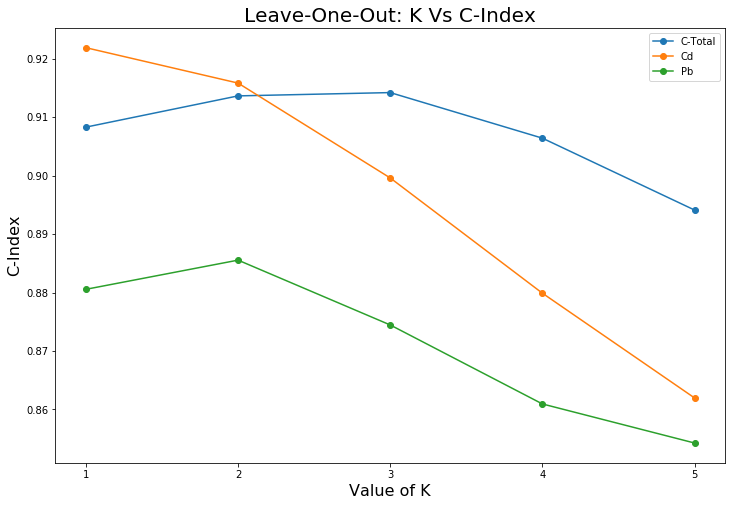

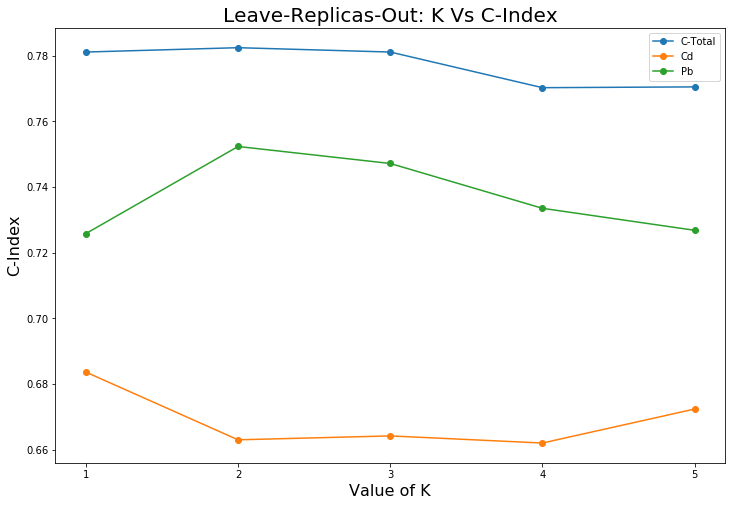

In [15]:
plt.figure(figsize=(12,8))
plt.plot(k,ctotal_cindex_looscores,marker='o',label="C-Total")
plt.plot(k,cd_cindex_looscores,marker='o',label="Cd")
plt.plot(k,pb_cindex_looscores,marker='o',label="Pb")
plt.title('Leave-One-Out: K Vs C-Index',fontsize=20)
plt.ylabel('C-Index',fontsize=16)
plt.xlabel('Value of K',fontsize=16)
plt.xticks(np.arange(1, 6, step=1))
plt.legend()
plt.show()

plt.figure(figsize=(12,8))
plt.plot(k,ctotal_cindex_scores,marker='o',label="C-Total")
plt.plot(k,cd_cindex_scores,marker='o',label="Cd")
plt.plot(k,pb_cindex_scores,marker='o',label="Pb")
plt.title('Leave-Replicas-Out: K Vs C-Index',fontsize=20)
plt.ylabel('C-Index',fontsize=16)
plt.xlabel('Value of K',fontsize=16)
plt.xticks(np.arange(1, 6, step=1))
plt.legend()
plt.show()

From the above plots you can see that for all 3 outputs LOOCV provided more optimistic results